<a href="https://colab.research.google.com/github/Dnzer/cafe/blob/main/ETAPA_III_Aplica%C3%A7%C3%A3o_de_M%C3%A9todos_de_Aprendizagem_de_M%C3%A1quina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

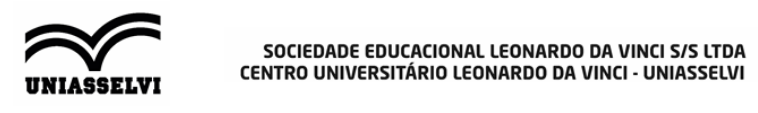

**Nome do Acadêmico:** Daniel Elias Morais José

**Matrícula:** 2746250

# Projeto I - Aplicação de Métodos de Aprendizagem de Máquina

## PREDIÇÃO DO PREÇO DAS  AÇÕES DE CAFÉ
O café é uma bebida estimulante produzida a partir dos grãos torrados do fruto do cafeeiro, sendo o café uma das bebidas mais consumidas do mundo.Tendo isso em vista o mercado de ações envolvendo esse insumo se faz muito atrativo para investidores.Como o auxilio de algoritmos de machine learning é possivel prever o preço futuro de uma ação, porém vale ressaltar que a variação no mercado financeiro depende de muitas variaveis por isso uma predição exata é de uma complexidade ímpar.


>## Objetivo


Esse projeto tem como objetivo realizar predições do preço da ação de café e avaliar o desempenho de cada algoritmo testado.

## Especificação Técnica


  O arquivo "coffee" que corresponde ao dataset denominado "Daily Coffee Price" esta em formato .csv, e possui 7  features: "Date","Open","High","Low","Close"	"Volume" e"Currency"
  


DESCRIÇÃO DOS TIPOS DAS FEATURES:

Date:feature onde estão as datas de cada apuração do preço das ações do café. Campo do tipo string

Open:feature onde estão os preços das ações no inicio da  apuração. Campo do tipo float.

High: feature contendo o maior preços das ações do café durante um dia.Campo do tipo float.

Low:feature contendo o menor preços das ações do café durante um dia.Campo do tipo float.

Close:feature contendo o preço final das ações em um dia específico.Campo do tipo float.

Volume:feature contendo a quantidade de ações vendidas.Campo do tipo inteiro.

Currency:feature contendo a moeda corrente do preço das ações. Tipo string



O dataset está disponível em: https://www.kaggle.com


**Métodos de Pré-processamento:** Limpeza da base, onde serão removidos espaços em branco e feature que não serão utilizadas,conversão da feature Date para o tipo Datatime e uma analise descritiva do dataframe para estimar a relação entre as feature.

**Tarefa de Aprendizado:** Será aplicado a tarefa de predição

**Modos de aprendizado:** Supervisionado.

**Algoritmos Avaliados:** Serão avaliados algoritmos  Regressão linear,SVM e Gradient Boosting

**Particionamento dos dados:** Serão utilizados 70% dos dados para o treinamento dos algoritmos e 30% para o teste

**Métrica utilizadas:** Acurácia,cross-validation,mean absolute error e mean squared error





Importando todas as bibliotecas que serão utilizadas no projeto

>## Pré-Processamento

---



Importando todas as bibliotecas que serão utilizadas no projeto

In [ ]:
import numpy as np #
import pandas as pd
import seaborn as sns
import plotly
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import cufflinks as cf
cf.go_offline()
from sklearn import metrics
%matplotlib inline



Para criar um dataframe com a base de dados utiliza-se a biblioteca pandas com a função read_csv(), passando com um dos argumentos da função a variavel url que corresponde ao caminho do diretório da base de dados.

In [ ]:
url = 'https://github.com/Dnzer/dataBase/blob/main/coffee.csv?raw=true'
df = pd.read_csv(url,index_col=0)

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2000-01-03,122.25,124.00,116.10,116.50,6640,USD
2000-01-04,116.25,120.50,115.75,116.25,5492,USD
2000-01-05,115.00,121.00,115.00,118.60,6165,USD
2000-01-06,119.00,121.40,116.50,116.85,5094,USD
2000-01-07,117.25,117.75,113.80,114.15,6855,USD


Verificando se há valores nulos

In [ ]:
#Check for any null values
df.isnull().sum()

Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64

Agora para realizar uma analise exploratória sobre a base de dados utilizaremos a feature Date, para isso o código abaixo transforma Date, o index do dataframe, em uma coluna.

In [ ]:
df=df.reset_index()

Verificando o tipo de dados da coluna Data, se o tipo de Date for string, será convertido em registros de data e hora

In [ ]:
#check data type of Date column, If data type is string convert it to timestamps.
type(df['Date'].iloc[0])

str

In [ ]:
#Converting data type using built in function.
df['Date']=pd.to_datetime(df['Date'])
type(df['Date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-03,122.25,124.00,116.10,116.50,6640,USD
1,2000-01-04,116.25,120.50,115.75,116.25,5492,USD
2,2000-01-05,115.00,121.00,115.00,118.60,6165,USD
3,2000-01-06,119.00,121.40,116.50,116.85,5094,USD
4,2000-01-07,117.25,117.75,113.80,114.15,6855,USD


A analise exploratória sobre a base de dados é uma etapa importante, pois é nesse momento que o cientista de dados começa a entender os dados de fato, para isso foram verificados o maiores e o menor valor da feature close  

In [ ]:
#Hightest close value using max() builtin funciton
df['Close'].max()

304.9

In [ ]:
#Lowest close value using max() builtin funciton
df['Close'].min()

41.5

A limpeza de dados basicamente consistiu em exluir a feature Currency e criar uma nova feature Year contendo apenas o ano de cada amostra.Posteriormente a feature Year foi usada como filtro para plotar o valor máximo da feature Close de cada ano,como o intuito de encontrar possiveis outliner.

In [ ]:
#Droping currency column as all the values are same "USD"
df.drop('Currency',axis=1,inplace=True)

In [ ]:
df['Year']=df['Date'].apply(lambda x: x.year)

In [ ]:
#Group by Year based on maximum value of corresponding columns
byyear=df.groupby('Year',as_index=False).max()

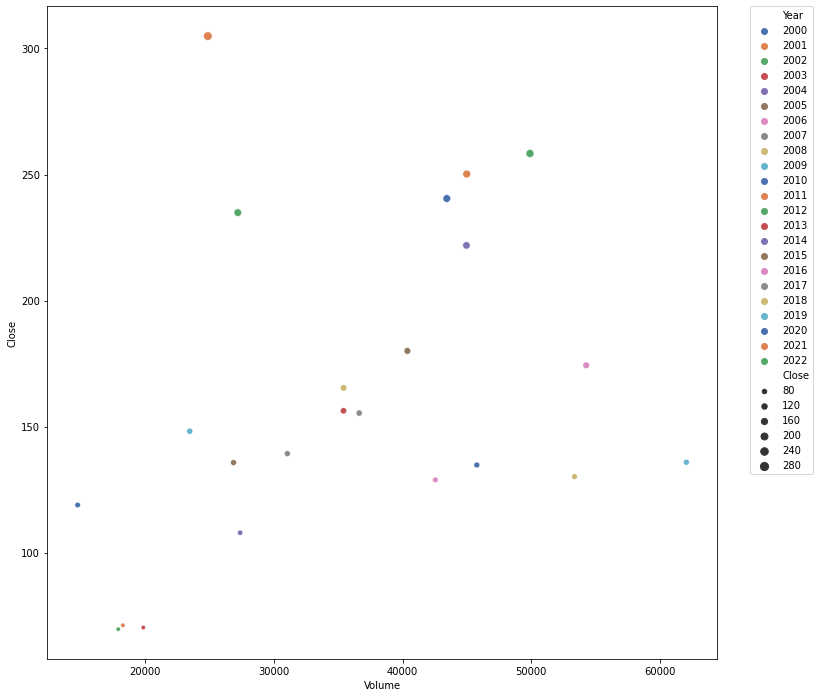

In [ ]:
#Scatter plot of volume and close value of hight Close value for each year.
plt.figure(figsize=(12,12))
sns.scatterplot(y='Close',x='Volume',data=byyear,hue='Year',size='Close',palette='deep')
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)

Estado atual do datafreme depois de todas as alterações:



In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Year
0,2000-01-03,122.25,124.00,116.10,116.50,6640,2000
1,2000-01-04,116.25,120.50,115.75,116.25,5492,2000
2,2000-01-05,115.00,121.00,115.00,118.60,6165,2000
3,2000-01-06,119.00,121.40,116.50,116.85,5094,2000
4,2000-01-07,117.25,117.75,113.80,114.15,6855,2000


In [ ]:
df.set_index('Date',inplace=True)

Verifiando a correlação entre as colunas do dataframe:

In [ ]:
#Check the correlation of variables
df.corr()

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Year'], dtype='object')

Separando o dataframe em variáveis preditoras e variável resposta.

In [ ]:
x=df[['Open', 'High', 'Low','Volume']]
y=df['Close']

Os dados foram divididos na proporção: 70% para Treinos e 30% para teste utilizando o método train_test_split()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30)

**ALGORITMO DE REGRESSÃO LINEAR**


---


A regressão linear encontra a reta que melhor relaciona as variáveis dependentes com a variável independentes e faz isso por meio de uma equação possibilitando fazer predição e comparações dos mesmos.




**Aplicando a regressão linear:**



In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
#predictions
predictionslr=lr.predict(x_test)
print(predictionslr)


[136.20252371 131.10628367 131.62062552 ...  46.99653947  60.0718088
 120.84215239]


AVALIANDO A REGRESSÃO LINEAR

---



In [ ]:
#Score do treino
lrScoreTrain=round(lr.score(x_train,y_train)*100,2)
print('Score:',lrScoreTrain,'%')

Score: 99.94 %


In [ ]:
#Score do teste
lrScoreTest=round(lr.score(x_test,y_test) * 100,2)
print('Score:',lrScoreTest,'%')

Score: 99.95 %


In [ ]:
metrics.mean_absolute_error(y_test,predictionslr)


0.7933632209033105

In [ ]:
metrics.mean_squared_error(y_test,predictionslr)

1.3995357556910266

CROSS VALIDATION

---



In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(lr,x_train,y_train,cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 1.00 (+/- 0.00)


**ALGORITMO SVR**

O método de Support Vector Regression (SVR) é baseada na análise de regressão que tem como objetivo gerar o número máximo de vetores de suporte com valores pequenos de erros a fim de separar os dados da melhor forma possível (DUCKER et al., 1997).

---


**Aplicando o SVM:**

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np



In [ ]:
regr= make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

In [ ]:
regr.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [ ]:
#predictions
predictionsSVR=regr.predict(x_test)
print(predictionsSVR)

[136.58105253 130.99912058 132.2022452  ...  50.59927195  58.23783073
 120.55634525]


**AVALIANDO O ALGORITMO SVR**

---



In [ ]:
#Score train
svrScoreTrain=round(regr.score(x_train, y_train) * 100, 2)
print('Score:',svrScoreTrain,'%')


Score: 98.2 %


In [ ]:
#Score test
svrScoreTest= round(regr.score(x_test, y_test) * 100, 2)
print('Score:',svrScoreTest,'%')

Score: 98.33 %


In [ ]:
metrics.mean_absolute_error(y_test,predictionsSVR)

2.520733196582758

In [ ]:
metrics.mean_squared_error(y_test,predictionsSVR)

45.61849589179257

**CROSS VALIDATION**

---



In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(regr,x_train,y_train,cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.97 (+/- 0.01)


###Gradient Boosting
---
O Gradient Boosting é um algoritmo de machine learning (Ensemble methods) para produz um modelo de previsão na forma de um conjunto de modelos de previsão fracos, usualmente são árvores de decisão, permitindo a otimização de uma função de perda diferenciável arbitrária, pois cada modelo fraco minimiza o erro do próximo modelo.



Importando as bibliotecas gradiente Boosting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor




In [ ]:
# Criando um regressor de Gradient Boosting com 100 árvores de decisão de profundidade 3.
gradr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [ ]:
# Treinando o modelo no dataset de treino
gradr.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
#predição
predictionsGradr=regr.predict(x_test)
print(predictionsGradr)



AVALIANDO O ALGORITMO GRADIENT BOOSTING.

---



In [ ]:
#score do treinamento
gradrScoreTrain= round(gradr.score(x_train, y_train) * 100, 2)
print('Score:',gradrScoreTrain,'%')

Score: 99.93 %


In [ ]:
#score do test
gradrScoreTest= round(gradr.score(x_test, y_test) * 100, 2)
print('Score:',gradrScoreTest,'%')

Score: 99.89 %


In [ ]:
metrics.mean_absolute_error(y_test,predictionsGradr)

2.2892760494230235

In [ ]:
metrics.mean_squared_error(y_test,predictionsGradr)

32.994448492615234

CROSS VALIDATION

---



In [ ]:
from sklearn.model_selection import cross_val_score
scoresgradr=cross_val_score(gradr,x_train,y_train,cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scoresgradr.mean(), scoresgradr.std() * 2))

**RESULTADOS**

---

Erro médio absoluto(mean absolute error) calcula o valor dos resíduos para cada um dos pontos e depois é tirado a média de todos esses resíduos, nessa metrica quando menor o valor mais eficiente é o algoritmo.

O score retorna o coeficiente de determinação da previsão,também é conhecido como R²,mostra o quão próximos os dados estão da linha de regressão ajustada.

A acuracia é a proximidade entre o valor obtido utilizando o cross validation com cv=5 e o valor verdadeiro das amostras.



**Regressão linear**

Score do treino : 99.95 %

score de teste: 99.94 %

mean absolute error:  0.8008008711171333

mean squared error: 1.4664134669989002

Accuracy: 1.00 (+/- 0.00)

**SVM**

Score do treino: 98.46 %

Score de teste: 98.49 %

mean absolute error: 2.4367880651582317

mean squared error: 43.73842004400856

Accuracy: 0.98 (+/- 0.01)

**Gradiente boosting**

Score do treino: 99.94 %

Score de teste: 99.88 %

mean absolute error: 2.2156412775956302

mean squared error: 27.100821644400348

Accuracy:1.00 (+/- 0.00)

**CONCLUSÃO**


Tendo em vista as metricas de desempenho: score de treinamento, score de teste, mean absolute error, mean squared error, o algoritmo que melhor performou foi a regressão linear. Mesmo tendo um empate técnico das métricas score de treino,score de teste e acuracia entre os algoritmos de regressão linear e gradient boosting,pois a métrica mean squard error do algoritmo de regressão linear mostrou que foram geradas menos outliner nas previsões desse algoritmo.  